In [ ]:
NAME = "Louie Ortiz"

---

# Dimensionality Reduction

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file and the PDF file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [ ]:
!pip install gensim

import pandas as pd
import numpy as np 
import gensim
import requests
import string

from IPython.display import Image
from sklearn.manifold import TSNE


!git clone https://github.com/CAHLR/d3-scatterplot.git
from google.colab.output import eval_js
from IPython.display import Javascript
from gensim.models import KeyedVectorsd

!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 

import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')

Cloning into 'd3-scatterplot'...
remote: Enumerating objects: 1045, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 1045 (delta 16), reused 0 (delta 0), pack-reused 1016
Receiving objects: 100% (1045/1045), 1.95 MiB | 7.87 MiB/s, done.
Resolving deltas: 100% (605/605), done.
--2021-11-03 07:34:38--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.79.206
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.79.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.1MB/s    in 99s     

2021-11-03 07:36:18 (15.8 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]  

True

### **Q1** (0.25 points)
Download your text corpus. (A good place to start is the [nltk corpus](http://www.nltk.org/nltk_data/) or the [gutenburg project](https://www.gutenberg.org/))

In [ ]:
#your code here

url = "https://www.gutenberg.org/cache/epub/8954/pg8954.txt"

In [ ]:
#Save the raw text that you just downloaded in this variable
raw = requests.get(url).content.decode('utf8')

In [ ]:
#This is an autograded cell, do not edit/delete
print(raw[:1000])

﻿
Project Gutenberg's Lady Audley's Secret, by Mary Elizabeth Braddon

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Lady Audley's Secret

Author: Mary Elizabeth Braddon

Posting Date: February 3, 2012 [EBook #8954]
Release Date: September, 2005
First Posted: August 29, 2003
[Last updated: December 20, 2020]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK LADY AUDLEY'S SECRET ***




Produced by Jonathan Ingram and Distributed Proofreaders





LADY AUDLEY'S SECRET

By Mary Elizabeth Braddon



CHAPTER I.

LUCY.

It lay down in a hollow, rich with fine old timber and luxuriant pastures; and you came upon it through an avenue of limes, bordered on either side by meadows, over the high hedges of which the cattle looked inqu


### **Q2** (0.25 points)
Tokenize your corpus. Make sure that that the result is a list of lists i.e. The top-level list (outer list) is a list of sentences, and the inner list is a list of words in a given sentence.

Consider the following text:

```
text = "I spent $15.35 on my lunch today. Food in Berkeley is very expensive!"
```

It could be tokenized as follows:

```
tok_corp = [['I', 'spent', '$', '15.35', 'on', 'my', 'lunch', 'today'],
 ['Food', 'in', 'Berkeley', 'is', 'very', 'expensive']]
```


Note: There are many different (and correct) ways of tokenizing. Your answer doesn't need to match exactly with this illustrative example.

In [ ]:
#code here
#Separating via REGEX
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

#Removing punctuation
nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))

  

In [ ]:
#Save the tokenized sentences as a list of list in this variable
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]




In [ ]:
#This is an autograded cell, do not edit/delete
for sent in tok_corp[:3]:
  print(sent)
  print("\n")

['Project', 'Gutenberg', "'s", 'Lady', 'Audley', "'s", 'Secret', 'by', 'Mary', 'Elizabeth', 'Braddon', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever']


['You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www']


['gutenberg']




### **Q3** (0.25 points)
Train gensim using your own dataset. Name the trained model variable as `model`.



In [ ]:
#code here
model = gensim.models.Word2Vec(tok_corp, min_count=1, size=16, window=8)


In [ ]:
#This is an autograded cell, do not edit/delete
print(f'Corpus Size: {model.corpus_total_words}')
print(f'Corpus Count: {model.corpus_count}')
print(f'Training time: {model.total_train_time}')
print(f'Sample words: {list(model.wv.vocab.keys())[:10]}')

Corpus Size: 154777
Corpus Count: 7862
Training time: 1.015958311000304
Sample words: ['Project', 'Gutenberg', "'s", 'Lady', 'Audley', 'Secret', 'by', 'Mary', 'Elizabeth', 'Braddon']


### **Q4** (0.25 points)



#### **Q4a** 

Create a list of the unique set of words from your corpus. Name the list variable as `unique_words`.


In [ ]:
#code here
combined = [" ".join(w) for w in tok_corp]
unique = []
for sent in combined:
    unique.append([w for w in sent.split()])
unique = list(set([item for sublist in unique for item in sublist]))

unique_words = unique

In [ ]:
#This is an autograded cell, do not edit/delete
print(unique_words[:10])

['clematis', 'suspended', 'inferiors', 'unfair', 'three', 'escort', 'messenger', 'charitable', 'dim', 'Royalty']


#### **Q4b** 

Extract respective vectors corresponding to the words in your corpus and store the vectors in a variable called `vector_list`.

In [ ]:
#code here
vector_list = model[unique_words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
#This is an autograded cell, do not edit/delete
print(f'Array Shape: {np.array(vector_list).shape}')
for i in range(5):
    print(unique_words[i], vector_list[i])

Array Shape: (11579, 16)
clematis [-0.00638289 -0.02735584  0.00838876  0.00894042  0.0629053  -0.02138034
 -0.01527588  0.01180616 -0.00631192  0.04659859 -0.04500886  0.03211865
 -0.00273318  0.02149832  0.05087439 -0.00423566]
suspended [-1.3987035e-02  3.6324842e-03  1.3457757e-02  7.6214266e-03
 -3.2042876e-02  4.6584178e-03  7.1642045e-03 -1.5133002e-02
 -2.3096133e-02  5.8365143e-03  2.3156434e-05  1.2380139e-03
  1.1152912e-02 -1.1489690e-02 -9.5806420e-03 -4.7238227e-03]
inferiors [ 0.01410239  0.02070847 -0.03007206  0.03013405 -0.01811272  0.02330864
  0.01550921 -0.02646797  0.01656035 -0.0146595  -0.0251701   0.03360765
 -0.0076869   0.006742   -0.0019592   0.01832098]
unfair [-0.02427584 -0.0079448   0.02403755  0.03598212  0.02530418  0.00622181
  0.01300174 -0.01404438 -0.05357643  0.03847761 -0.01222895  0.04876578
  0.0510198   0.01518742  0.06603301  0.00297659]
three [-0.96056986 -0.52122885  0.13913207  1.4873884   0.80082625  0.04955395
  0.10821723  0.16586597 -0

### **Q5** (3 points)
Based on your knowledge and understanding of the text corpus you have chosen, **form 3 hypotheses** of analogies or relationships (between words) that you expect will hold and **give a reason why. Experimentally validate these hypotheses** using similarity of the word vectors. 

**Example**: If using Moby Dick as the corpus, one hypothesis might be that the whale, "Moby Dick" is (cosine) more similar to "fate" than to "evil" because Moby Dick is symbolic of the nature and the universe and isn't necessarily 'bad'. Or "Moby Dick" is more similar to "opposition" than to "surrender" because Moby Dick fights for its survival.

Note: Please do NOT use the same example as in the prompt. 

Note 2: It's okay if the model disproves your hypotheses.

Hypothesis 1: "Audley" and "George" will have a high cosine similarity, since they are spoken about eachother in conjunction several times throughout *Lady Audley's Secret*

In [ ]:
#your code here for validating hypotheses 1
similarity_h1 = model.similarity('Audley', 'George')
print(similarity_h1)

0.88646805


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


We can see the two words have a cosine similarity of 88.6%, which can attest to their highly correlated relationship.

Hypothesis 2: "Audley" + "Robert" = "suspicion"

In [ ]:
#your code here for validating hypotheses 2
similar_words = model.most_similar(positive=['Audley','Robert'], topn=5000)

for i, (word, similar_rate) in enumerate(similar_words):
    if word == 'suspicion':
        print('[Rank ' + str(i) + ']',':', (word, similar_rate))
  
similarity_h2_1 = model.similarity('Audley', 'suspicion')
similarity_h2_2 = model.similarity('Robert', 'suspicion')


print(similarity_h2_1, similarity_h2_2)

[Rank 1499] : ('suspicion', 0.9560012221336365)
0.92015177 0.96142995


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


We can see that separately, "Audley" and "Robert" have high cosine similarities to "suspicion". When the two are added, "suspicion" still has a high similarity rate of 95%. Although, we cant concretely say that "Audley" + "Robert" = "suspicion" sincere there are many other words with high similarity rates. It is interesting to note that "Robert" has a higher similarity to "suspicion", since in the book he is the one who is suspicious of Lady Audley.

Hypothesis 3: "George" + "Robert" = "love"

In [ ]:
#your code here for validating hypotheses 3
similar_words = model.most_similar(positive=['Robert','George'], topn=10000)

for i, (word, similar_rate) in enumerate(similar_words):
    if word == 'love':
        print('[Rank ' + str(i) + ']',':', (word, similar_rate))
  
similarity_h3_1 = model.similarity('Robert', 'love')
similarity_h3_2 = model.similarity('George', 'love')


print(similarity_h3_1, similarity_h3_2)

[Rank 5746] : ('love', 0.8624175190925598)
0.84514976 0.8540883


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


We can see that "Robert" and "George" have have pretty high individual similarities to "love", but adding the two doesn't produce a high enough equation equaling to "love". I eventually increased the number of similar words to 10000 from 5000, and "love" showed as the 5746th word most similar to the two, with around 86%. I wanted to test this because Robert and George have a very caring relationship throughout the novel

### **Q6** Visualizing the trained vectors (1.5 points)

#### **Q6a**

Run Kmeans clustering on your word vectors (as you did in Q-6 of Lab-5). Use the word vectors from the model you trained in this lab.

In [ ]:
#your code here
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=25, random_state=42)
X = np.array(vector_list)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)
kmeans.labels_

array([ 1,  1,  1, ..., 14,  1, 11], dtype=int32)

#### **Q6b**
Reduce the dimensionality of your word vectors using TSNE

In [ ]:
#your code here

data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 11579 samples in 0.032s...
[t-SNE] Computed neighbors for 11579 samples in 3.256s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11579
[t-SNE] Computed conditional probabilities for sample 2000 / 11579
[t-SNE] Computed conditional probabilities for sample 3000 / 11579
[t-SNE] Computed conditional probabilities for sample 4000 / 11579
[t-SNE] Computed conditional probabilities for sample 5000 / 11579
[t-SNE] Computed conditional probabilities for sample 6000 / 11579
[t-SNE] Computed conditional probabilities for sample 7000 / 11579
[t-SNE] Computed conditional probabilities for sample 8000 / 11579
[t-SNE] Computed conditional probabilities for sample 9000 / 11579
[t-SNE] Computed conditional probabilities for sample 10000 / 11579
[t-SNE] Computed conditional probabilities for sample 11000 / 11579
[t-SNE] Computed conditional probabilities for sample 11579 / 11579
[t-SNE] Mean sigma: 0.029214
[t-SNE] Computed con

#### **Q6c**

#### Create a dataframe with the following columns:

| Column |Description|
| --- | --- | 
| x | the first dimension of result from TSNE |
| y | the second dimension of result from TSNE |
| Feature 1 | the word corresponding to the vector |
| Feature 2 | the kmeans cluster label |

<br>

Below is a sample of what the dataframe could look like:

|x	|y|	Feature 1|	Feature 2|
| --- | --- | --- | --- | 
|	7.154159	|9.251100|	lips	|8|
|	-53.254147|	-13.514915|	them|	9|
|	34.049191	|-13.402843|	topic|	0|
|	-32.515320|	28.699677|	sofa|	24|
|	13.006302	|-4.270626|	half-past|	21|

In [ ]:
#your code here
df = pd.DataFrame(data_embed[:,:2],columns=["x","y"])
df['Feature 1'] = unique_words
df['Feature 2'] = kmeans.labels_
df.head()

,x,y,Feature 1,Feature 2
0,23.820145,-8.048139,clematis,1
1,27.469666,-57.266872,suspended,1
2,24.970781,-46.855526,inferiors,1
3,-1.187121,3.788462,unfair,1
4,-40.050507,-39.505772,three,16


#### **Q6d: Visualization** 

In this question, you are required to visualize and explore the reduced dataset you created in Q6c using the [d3-scatterplot](https://github.com/CAHLR/d3-scatterplot) library.

Note: The first code-chunk at the top in this notebook clones the libary from github. Make sure that it has been executed before you proceed.

##### Save your dataset as a tsv file 'd3-scatterplot/mytext.tsv'

Example:

```
df.to_csv('d3-scatterplot/mytext.tsv', sep='\t', index=False)
```


Note 1: The TSV file needs to be stored in the `d3-scatterplot` folder so that the d3-scatterplot library can access it.

Note 2: Make sure to save the TSV file WITHOUT the row index i.e. use `index=False`.


In [ ]:
#your code here
df.to_csv('d3-scatterplot/mytext.tsv', sep='\t', index=False)

##### Visualize the reduced vectors by running the following code


In [ ]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'mytext.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

Color the points by their kmeans cluster. You can do this by choosing "Feature 2" as the variable in the "Color" drop-down in the visualization. 

Pleae include a snapshot of your visualization in the notebook. Refer to the tutorial video, and/or follow the steps below:

1) Take a sanpshot of the visualization and save it on your computer with the filename `trained_scatter.png`

2) Upload the `trained_scatter.png` by clicking on the 'Files' icon on the left sidebar and clicking on the upload icon (the one with an upward arrow on top left)

3) Run the code below to display the image

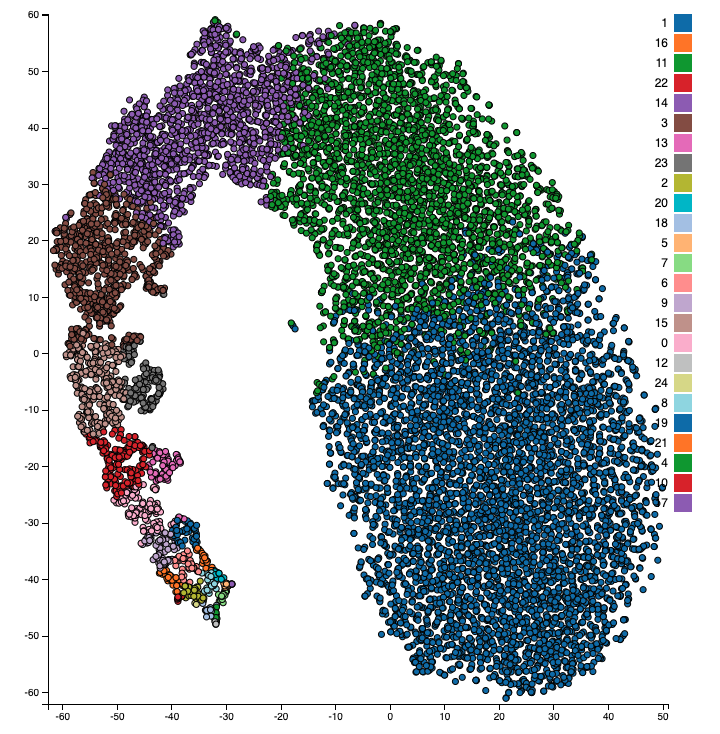

In [ ]:
#This is an autograded cell, do not edit/delete
Image('trained_scatter.png')

### **Q7** Visualizing the PRE-TRAINED vectors (1.5 points)

In this question, you'll execute the same analysis as in Q6, but on PRE-TRAINED vectors.

#### **Q7a**

Load the google vector model 

(It must be downloaded as `GoogleNews-vectors-negative300.bin.gz` for you if you ran the first code-chunk at the top of this notebook)


In [ ]:
#your code here

google_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

Downsample the pre-trained google model to anywhere between 10,000 to 25,000 words.

In [ ]:
#your code here
n = 15000

words = list(google_model.vocab)
word_count_list = []

for word in words:
    word_count_list.append((word, google_model.vocab[word].count))
    
sorted_wort_count_list = sorted(word_count_list, reverse=True, key=lambda word_count: word_count[1]) 

sampled_words = [word_count[0] for word_count in sorted_wort_count_list[:n]]

Create a list of the unique set of words from this downsampled model

In [ ]:
#your code here
unique = []
for sent in sampled_words:
    unique.append([w for w in sent.split()])
unique = list(set([item for sublist in unique for item in sublist]))

unique_words = unique
print(unique_words[:10])

['Medical', 'bureaucracy', 'Analysis', 'environmental', 'suspended', 'spur', 'unfair', 'three', 'escort', 'Off']


Extract respective vectors corresponding to the words in the down-sampled, pre-trained model

In [ ]:
#your code here

google_vector_list=[]
for word in sampled_words:
    google_vector_list.append(google_model[word])

#### **Q7b**

Run Kmeans clustering on the pre-trained word vectors. Make sure to use the word vectors from the pre-trained model.

In [ ]:
#your code here

kmeans = KMeans(n_clusters=25, random_state=42)
X = np.array(google_vector_list)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)
kmeans.labels_

array([17, 17, 17, ...,  0,  8, 14], dtype=int32)

#### **Q7c**
Reduce the dimensionality of the word vectors from the pre-trained model using TSNE

In [ ]:
#your code here
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(google_vector_list)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.687s...
[t-SNE] Computed neighbors for 15000 samples in 175.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for 

#### **Q7d**

#### Create a dataframe with the following columns using the pre-trained vectors and corpus:

| Column |Description|
| --- | --- | 
| x | the first dimension of result from TSNE |
| y | the second dimension of result from TSNE |
| Feature 1 | the word corresponding to the vector |
| Feature 2 | the kmeans cluster label |

<br>

Below is a sample of what the dataframe could look like:

|x	|y|	Feature 1|	Feature 2|
| --- | --- | --- | --- | 
|	7.154159	|9.251100|	lips	|8|
|	-53.254147|	-13.514915|	them|	9|
|	34.049191	|-13.402843|	topic|	0|
|	-32.515320|	28.699677|	sofa|	24|
|	13.006302	|-4.270626|	half-past|	21|

In [ ]:
#your code here
df = pd.DataFrame(data_embed[:,:2],columns=["x","y"])
df['Feature 1'] = unique_words
df['Feature 2'] = kmeans.labels_
df.head()

,x,y,Feature 1,Feature 2
0,-3.115335,-7.205281,Medical,17
1,-4.323785,-4.899779,bureaucracy,17
2,-5.593441,-6.091235,Analysis,17
3,-4.018686,-10.447567,environmental,17
4,-17.638260,-25.747494,suspended,10


#### **Q7e: Visualization** 

In this question, you are required to visualize and explore the reduced dataset **from the pretrained model** you created in Q7d using the [d3-scatterplot](https://github.com/CAHLR/d3-scatterplot) library.

Note: The first code-chunk at the top in this notebook clones the libary from github. Make sure that it has been executed before you proceed.

##### Save your dataset as a tsv file 'd3-scatterplot/google_mytext.tsv'

Example:

```
google_df.to_csv('d3-scatterplot/google_mytext.tsv', sep='\t', index=False)
```


Note 1: The TSV file needs to be stored in the `d3-scatterplot` folder so that the d3-scatterplot library can access it.

Note 2: Make sure to save the TSV file WITHOUT the row index i.e. use `index=False`.


In [ ]:
#your code here
#your code here
df.to_csv('d3-scatterplot/google_mytext.tsv', sep='\t', index=False)

##### Visualize the reduced vectors by running the following code


In [ ]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8001
data_file = 'google_mytext.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

Color the points by their kmeans cluster. You can do this by choosing "Feature 2" as the variable in the "Color" drop-down in the visualization. 

Pleae include a snapshot of your visualization in the notebook. Refer to the tutorial video, and/or follow the steps below:

1) Take a sanpshot of the visualization and save it on your computer with the filename `google_trained_scatter.png`

2) Upload the `google_trained_scatter.png` by clicking on the 'Files' icon on the left sidebar and clicking on the upload icon (the one with an upward arrow on top left)

3) Run the code below to display the image

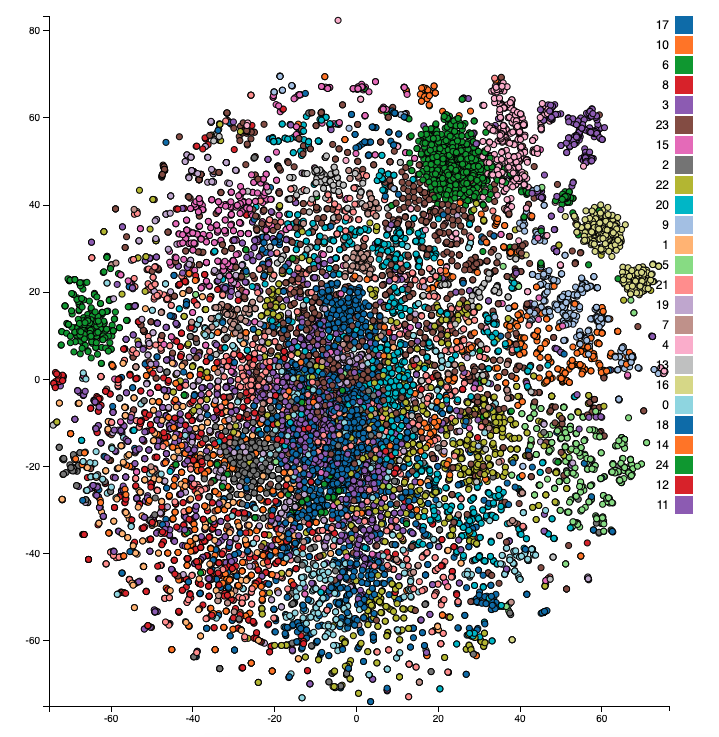

In [ ]:
#This is an autograded cell, do not edit/delete
Image('google_trained_scatter.png')

### **Q8: Exploration** (0.5 point) 

This is an open-ended question.

On the visualizations in Q6 & Q7, lasso select a group of points with the left mouse button and look at summaries of the group on the right-side of the plot. (Refer to the tutorial video for a demo on the lasso selection). Also look at the words / features of the selected points. 

Comment on any patterns / similarities you see in the selected words in the visualization for the pre-trained vectors and the vectors trained on your corpus. Are you able to find any group of points that are close to each other in the 2D space that also have semantic similarity?

For both reduction visualizations, I looked at the k=6 cluster. For Q6 (my corpus), some of the resulting words were

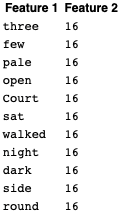

For Q7 (google corpus), these were the resulting word features for cluster 6

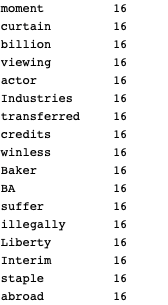

From initial analysis, although they share the same kmeans cluster number, they dont seem to have an apparent similarity or trend.